### 連續型變數
1. Start time:<br>
    此特性定義流的開始時間。它是網絡流場的基本特徵之一。開始時間轉換為分類的數值。將時間格式轉換為數值的公式是小時* 3600 +分鐘* 60 +秒，它與結束時間比較表明流量是惡意的。
2. Duration:<br>
    流的持續時間表示完成特定流所需的總時間。流的持續時間被用來計算平均分組速率和平均位元組速率。  
3. TotPkts: Total packets<br>
    特徵被定義為在特定流中傳輸的數据包的個數。它存儲在特定時間段或流期間傳輸的數据包的數量。  
4. TotBytes: Total Bytes (TotBytes, SrcBytes)<br>
    内容指定用戶端根據請求發送的總位元組數。它的總位元組大小是衡量網絡量測的一個重要名額。

### 類別型變數
1. Source IP Address: 找出僵屍網路的label<br>
    The IP Address is used to uniquely identify the desired host to contact. It is also one of the basic features of net flow fields. The source IP address is the IP address of the computer and or website that are currently visiting, or using. The source IP address is converted to decimal format for further processing. It is computed as follows 10.0.2.112 is converted to 167772784 
2. Protocol:<br>
    協定是一組特殊的規則，在通信連接中，端點在通信時使用。協定指定通信實體之間的互動。使用的協定有不同的類型，它們是TCP、UDP、ICMP、SMTP等。
3. port: (Sport, Dport)<br>
    允許我們識別我們的數據或請求必須發送到的服務或應用程序。它們可用於獲取針對攻擊目標的遠程系統的資訊。埠號80，53，25被標記為具有不同僵屍網路攻擊的惡意流，它們是HTTP建立的僵屍網路、垃圾郵件僵屍網路和基於DNS伺服器的僵屍網路。16-bit to 10-bit processing.
4. dir:<br>
    訓示指定數據是否沿兩個方向或僅一個方向移動。方向也指定路徑，流量將從源到目的地通過互聯網絡。大多數流是雙向的，可以用雙面箭頭表示，單向流用單邊箭頭表示。大多數垃圾郵件僵屍網路使用單向流。
5. States:<br>
    表示網路流的狀態有不同的類型，它們是SYN、RST、CON、ACK、FIN.。 There are different types of states that represent the network flow they are SYN, RST, CON, ACK, FIN. In the SYN state client sends a SYN message which contains the server's port and the client's Initial Sequence Number to the server. The server sends back its own SYN and ACK.The Client sends an ACK. Final state is the state is a now a half-closed connection. The client no longer sends data, but is still able to receive data from the server. Upon receiving this FIN, the server enters a close state. CON is the connection state in when once the connection is established it is in CON state. The RST state is the connection reset state in which the host refuses a connection. Too many SYN state is received means sender is infected. Too many RST state is received means receiver is infected.
6. Tos:  (sToS, dToS)<br>
    ToS is defined as type of service。它是一種將優先順序分配給每個IP包的機制，以及請求特定處理的機制，如高輸送量、高可靠性或低延遲。通常情况下欄位將為0。

In [4]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

In [3]:
import random
random.seed(9001)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette()
%matplotlib inline

In [6]:
def loadingdata(path):
    df = pd.read_csv(path)

    print (df.isnull().sum())
    print ('Number of Original Dataset : %d' % (df.shape[0]))
    return df

In [7]:
# loading dataset

path = "20110810_preprocessing.txt"
df = loadingdata(path)

StartTime    0
Dur          0
Proto        0
SrcAddr      0
Sport        0
Dir          0
DstAddr      0
Dport        0
State        0
sTos         0
dTos         0
TotPkts      0
TotBytes     0
SrcBytes     0
label        0
dtype: int64
Number of Original Dataset : 2824636


In [8]:
# 計算每個類別的資訊(幾種類別, 高比例(>0.7)的數量)

def pivot(df, col):
    f = {'label':['count', 'sum', 'max']}
    cnt_srs = df.groupby(str(col)).aggregate(f).reset_index()
    cnt_srs.columns = [str(col), "p_count", "botnet", "p_max"]
    cnt_srs["botnet_ratio"] = cnt_srs.botnet/cnt_srs.p_count
    cnt_srs = cnt_srs.sort_values(by = "p_count", axis = 0, ascending = False).reset_index(drop=True)

    print ("================= Pivot of "+str(col)+" =================")
    print ("size of distinct Sport :", cnt_srs.shape[0])
    print ("size of high ratio of Sport", cnt_srs[(cnt_srs.botnet_ratio > 0.7)].botnet.sum())
    print (cnt_srs.head(10))
    return cnt_srs

================= Pivot of Proto =================
size of distinct Sport : 15
size of high ratio of Sport 0
       Proto  p_count  botnet  p_max  botnet_ratio
0        udp  2270083   29203      1      0.012864
1        tcp   507557   11756      1      0.023162
2       icmp    39694       2      1      0.000050
3        rtp     2570       0      0      0.000000
4       rtcp     2339       0      0      0.000000
5       igmp     1803       0      0      0.000000
6        arp      477       0      0      0.000000
7  ipv6-icmp       58       0      0      0.000000
8    ipx/spx       13       0      0      0.000000
9        esp       10       0      0      0.000000


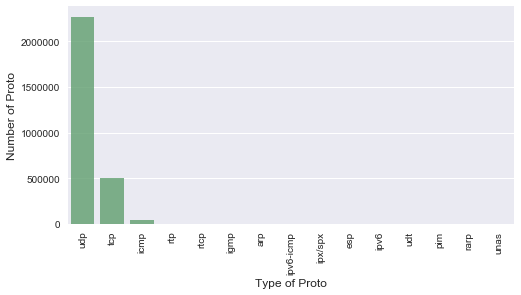

In [9]:
# Protocal

cnt_srs = pivot(df, "Proto")

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.Proto, cnt_srs.p_count, alpha=0.8, color=color[1])
plt.ylabel('Number of Proto', fontsize=12)
plt.xlabel('Type of Proto', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
# Sport & Dport

cnt_srs = pivot(df, "Sport")
cnt_srs = pivot(df, "Dport")

================= Pivot of Sport =================
size of distinct Sport : 64742
size of high ratio of Sport 28969
   Sport  p_count  botnet  p_max  botnet_ratio
0  13363   152477       0      0      0.000000
1    771    23596       2      1      0.000085
2   2077    16161   16116      1      0.997216
3   2079    12477   12427      1      0.995993
4  12200    11115       0      0      0.000000
5     80     5883       0      0      0.000000
6  35155     5285       0      0      0.000000
7    259     3588       0      0      0.000000
8   6881     3523       0      0      0.000000
9   2034     3205       3      1      0.000936
================= Pivot of Dport =================
size of distinct Sport : 64643
size of high ratio of Sport 10333
   Dport  p_count  botnet  p_max  botnet_ratio
0  13363  1022306       0      0      0.000000
1     53   992651   29197      1      0.029413
2     80   258051    1243      1      0.004817
3    443    70965     119      1      0.001677
4   6881    2316

> Using mean encoding

================= Pivot of Dir =================
size of distinct Sport : 7
size of high ratio of Sport 0
     Dir  p_count  botnet  p_max  botnet_ratio
0    <->  2191885   26146      1      0.011929
1     ->   614958   14815      1      0.024091
2     <-     7065       0      0      0.000000
3    <?>     6176       0      0      0.000000
4     ?>     4066       0      0      0.000000
5    who      481       0      0      0.000000
6     <?        5       0      0      0.000000


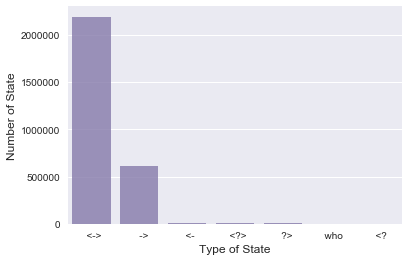

In [10]:
# Direction

cnt_srs = pivot(df, "Dir")

plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.Dir, cnt_srs.p_count, alpha=0.8, color=color[3])
plt.ylabel('Number of State', fontsize=12)
plt.xlabel('Type of State', fontsize=12)
plt.show()

================= Pivot of State =================
size of distinct Sport : 230
size of high ratio of Sport 0
        State  p_count  botnet  p_max  botnet_ratio
0         CON  2190508   26146      1      0.011936
1   FSPA_FSPA   216341     995      1      0.004599
2         INT    85813    3057      1      0.035624
3          S_    68710    9777      1      0.142294
4        S_RA    61105     200      1      0.003273
5   SRPA_FSPA    35460     126      1      0.003553
6     FSA_FSA    26138      35      1      0.001339
7         URP    23598       2      1      0.000085
8  FSRPA_FSPA    13547      37      1      0.002731
9  FSPA_FSRPA    10560       3      1      0.000284


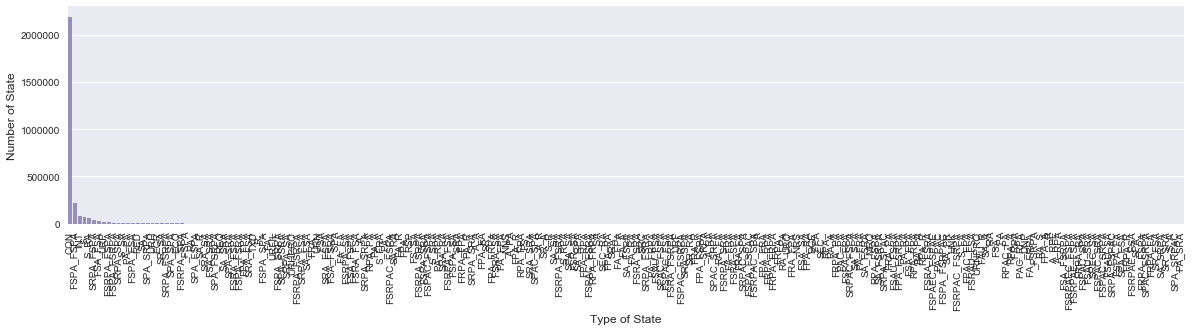

In [11]:
# State

cnt_srs = pivot(df, "State")

plt.figure(figsize=(20,4))
sns.barplot(cnt_srs.State, cnt_srs.p_count, alpha=0.8, color=color[3])
plt.ylabel('Number of State', fontsize=12)
plt.xlabel('Type of State', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

================= Pivot of sTos =================
size of distinct Sport : 5
size of high ratio of Sport 0
    sTos  p_count  botnet  p_max  botnet_ratio
0    0.0  2821313   40961      1      0.014518
1    2.0     1351       0      0      0.000000
2    3.0      964       0      0      0.000000
3    1.0      632       0      0      0.000000
4  192.0      376       0      0      0.000000


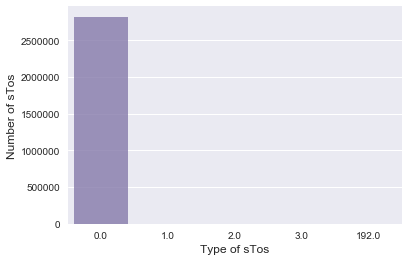

================= Pivot of dTos =================
size of distinct Sport : 4
size of high ratio of Sport 0
   dTos  p_count  botnet  p_max  botnet_ratio
0   0.0  2824138   40959      1      0.014503
1   2.0      245       2      1      0.008163
2   3.0      211       0      0      0.000000
3   1.0       42       0      0      0.000000


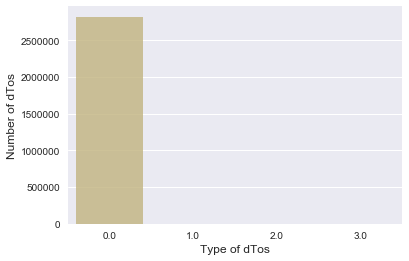

In [13]:
# Type of Service

cnt_srs = pivot(df, "sTos")
plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.sTos, cnt_srs.p_count, alpha=0.8, color=color[3])
plt.ylabel('Number of sTos', fontsize=12)
plt.xlabel('Type of sTos', fontsize=12)
plt.show()

cnt_srs = pivot(df, "dTos")
plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.dTos, cnt_srs.p_count, alpha=0.8, color=color[4])
plt.ylabel('Number of dTos', fontsize=12)
plt.xlabel('Type of dTos', fontsize=12)
plt.show()

> Because must of these categorical variable are the same, I want to remove these.